# Task 2-Prediction Using Unsupervised ML

## Nimmi Nelson

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
iris=pd.read_csv("/content/Iris.csv")   #importing data

# Exploratory Data Analysis

In [26]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [28]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [29]:
iris.shape

(150, 6)

In [30]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [31]:
iris.groupby(iris['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [32]:
print(iris['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Identifying independent variables

In [33]:
x=iris.iloc[:,1:-1].values

Finding optimum number of clusters for k-mean clustering using Elbow method.





<function matplotlib.pyplot.show(close=None, block=None)>

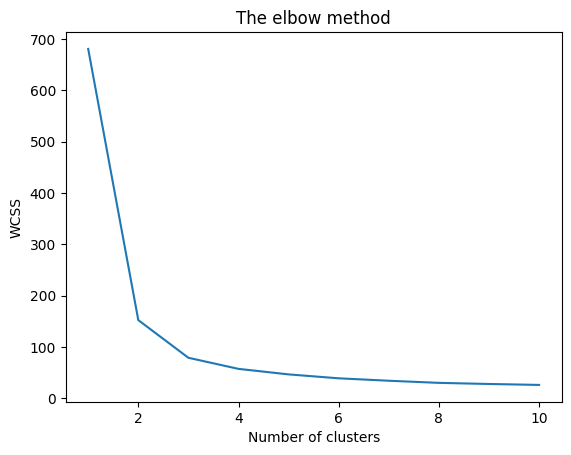

In [34]:
from sklearn.cluster import KMeans

#finding optimum number of clusters for k-means clustering
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#Elbow Method plot
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')    #within cluster sum of squares
plt.show

Here,by using elbow method we found that the optimum number of clusters is 3 for iris dataset.

Fitting k-means clustering model

In [35]:
#K-Means Clustering
k_means=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=42)
y_kmeans=k_means.fit_predict(x)

In [36]:
#centroids
k_means.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## **Visualizing the clusters**

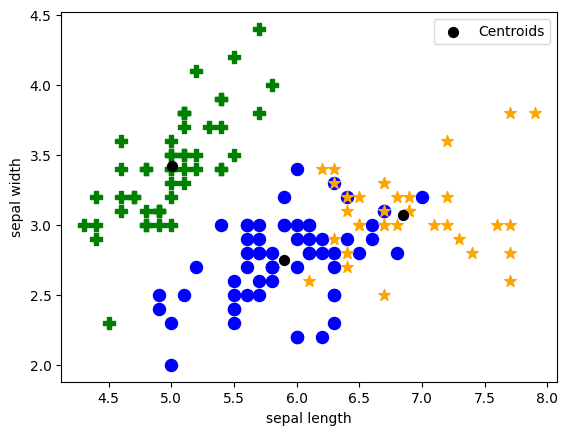

In [37]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=75,c='blue',marker='o')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=75,c='green',marker='P')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=75,c='orange',marker='*')

plt.xlabel("sepal length")
plt.ylabel("sepal width")

#plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=50,c='black',label='Centroids')

plt.legend()
plt.show()